<a href="https://colab.research.google.com/github/pouya-mhb/DS-ML-DL-Practices/blob/main/Ensemble_Learning_on_6Labled_Emo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.base import clone
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.base import clone

In [60]:
# Load the dataset
file_path = "emotions.csv"
df = pd.read_csv(file_path)

In [61]:
# Separate features and emotion labels
X = df.iloc[:, :-6]  # All features
y = df.iloc[:, -6:]  # Emotion labels

In [43]:
# Display basic information about the dataset
df.head()

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,2.0,0.245457,0.105065,0.405399,0,1,1,0,0,0
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,2.0,0.343547,0.276366,0.710924,1,0,0,0,0,1
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,3.0,0.188693,0.045941,0.457372,0,1,0,0,0,1
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,2.0,0.102839,0.241934,0.351009,0,0,1,0,0,0
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,2.0,0.195196,0.310801,0.683817,0,0,0,1,0,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 78 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Mean_Acc1298_Mean_Mem40_Centroid  593 non-null    float64
 1   Mean_Acc1298_Mean_Mem40_Rolloff   593 non-null    float64
 2   Mean_Acc1298_Mean_Mem40_Flux      593 non-null    float64
 3   Mean_Acc1298_Mean_Mem40_MFCC_0    593 non-null    float64
 4   Mean_Acc1298_Mean_Mem40_MFCC_1    593 non-null    float64
 5   Mean_Acc1298_Mean_Mem40_MFCC_2    593 non-null    float64
 6   Mean_Acc1298_Mean_Mem40_MFCC_3    593 non-null    float64
 7   Mean_Acc1298_Mean_Mem40_MFCC_4    593 non-null    float64
 8   Mean_Acc1298_Mean_Mem40_MFCC_5    593 non-null    float64
 9   Mean_Acc1298_Mean_Mem40_MFCC_6    593 non-null    float64
 10  Mean_Acc1298_Mean_Mem40_MFCC_7    593 non-null    float64
 11  Mean_Acc1298_Mean_Mem40_MFCC_8    593 non-null    float64
 12  Mean_Acc

In [45]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (593, 78)


In [46]:
# Inspect data types
print("\nData Types:\n", df.dtypes)


Data Types:
 Mean_Acc1298_Mean_Mem40_Centroid    float64
Mean_Acc1298_Mean_Mem40_Rolloff     float64
Mean_Acc1298_Mean_Mem40_Flux        float64
Mean_Acc1298_Mean_Mem40_MFCC_0      float64
Mean_Acc1298_Mean_Mem40_MFCC_1      float64
                                     ...   
happy-pleased                         int64
relaxing-calm                         int64
quiet-still                           int64
sad-lonely                            int64
angry-aggresive                       int64
Length: 78, dtype: object


In [47]:
# Descriptive statistics for numerical features
print("\nDescriptive Statistics:\n", df.describe())


Descriptive Statistics:
        Mean_Acc1298_Mean_Mem40_Centroid  Mean_Acc1298_Mean_Mem40_Rolloff  \
count                        593.000000                       593.000000   
mean                           0.069309                         0.195399   
std                            0.031293                         0.117605   
min                            0.010201                         0.038286   
25%                            0.044781                         0.107742   
50%                            0.065251                         0.169757   
75%                            0.086290                         0.257668   
max                            0.195412                         0.698277   

       Mean_Acc1298_Mean_Mem40_Flux  Mean_Acc1298_Mean_Mem40_MFCC_0  \
count                    593.000000                      593.000000   
mean                       0.085695                      -72.998228   
std                        0.009260                        7.580804   
min  

In [48]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Mean_Acc1298_Mean_Mem40_Centroid    0
Mean_Acc1298_Mean_Mem40_Rolloff     0
Mean_Acc1298_Mean_Mem40_Flux        0
Mean_Acc1298_Mean_Mem40_MFCC_0      0
Mean_Acc1298_Mean_Mem40_MFCC_1      0
                                   ..
happy-pleased                       0
relaxing-calm                       0
quiet-still                         0
sad-lonely                          0
angry-aggresive                     0
Length: 78, dtype: int64


In [49]:
# Look for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 0


In [50]:
# Analyze the distribution of the target variable
print("\nTarget Variable Distribution:\n", df.iloc[:, -6:].value_counts())


Target Variable Distribution:
 amazed-suprised  happy-pleased  relaxing-calm  quiet-still  sad-lonely  angry-aggresive
1                0              0              0            0           1                  81
0                1              1              0            0           0                  74
                 0              0              0            0           1                  72
                                1              1            1           0                  67
                                               0            0           0                  42
1                1              0              0            0           0                  38
0                0              0              1            1           0                  37
                                1              1            0           0                  30
                                               0            1           0                  25
1                0              0 

<ipython-input-51-00b041b00dee>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")


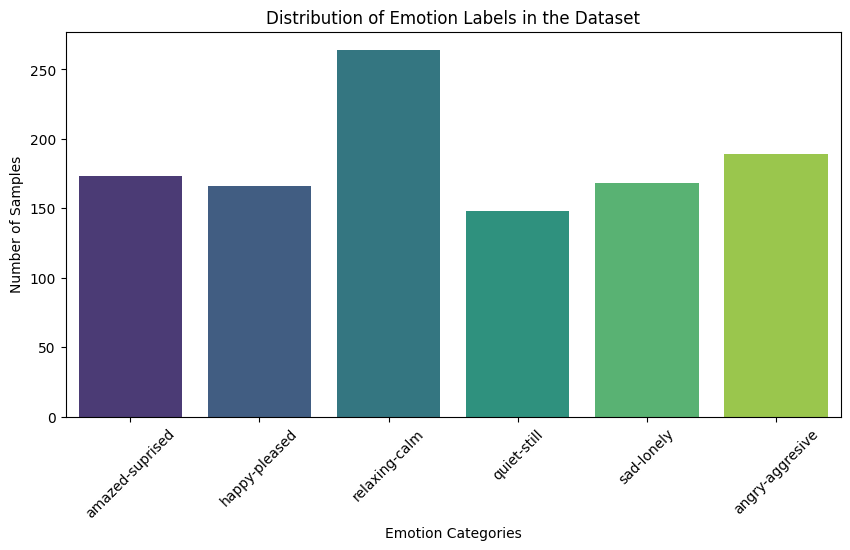

In [51]:
# Count occurrences of each emotion label
emotion_counts = df.iloc[:, -6:].sum()

# Plot the distribution of emotion labels
plt.figure(figsize=(10, 5))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette="viridis")
plt.xlabel("Emotion Categories")
plt.ylabel("Number of Samples")
plt.title("Distribution of Emotion Labels in the Dataset")
plt.xticks(rotation=45)
plt.show()

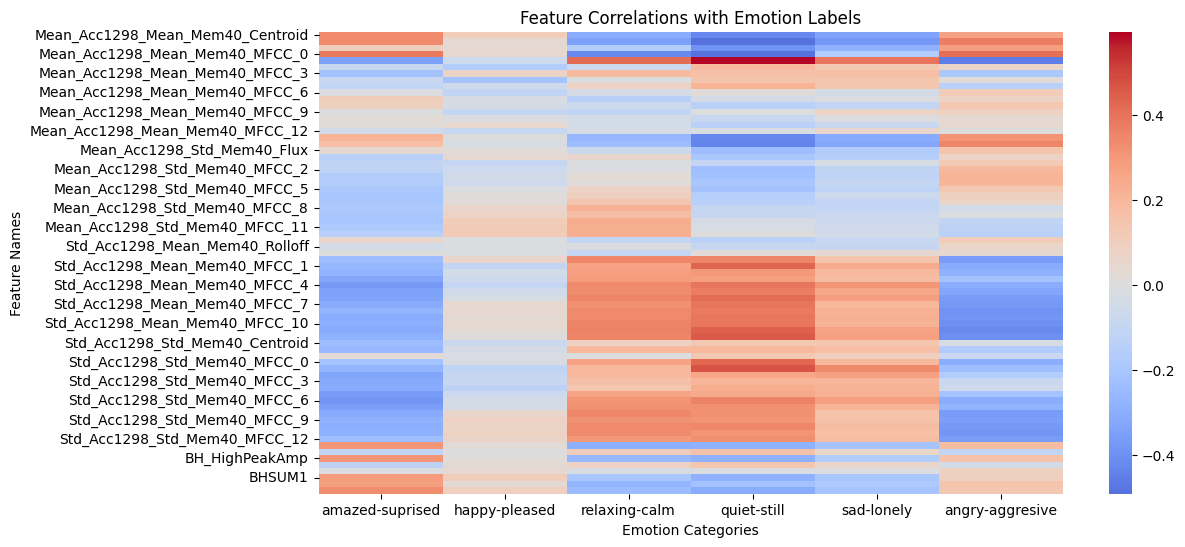

In [52]:

# Compute correlation matrix for features and emotions
correlation_matrix = df.corr()

# Extract correlations of features with emotion labels
emotion_correlations = correlation_matrix.iloc[:-6, -6:]

# Plot correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(emotion_correlations, cmap="coolwarm", center=0)
plt.title("Feature Correlations with Emotion Labels")
plt.xlabel("Emotion Categories")
plt.ylabel("Feature Names")
plt.show()


In [62]:
# Train a Random Forest model to determine feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Select top features based on importance threshold (top 20%)
threshold = np.percentile(feature_importances, 80)  # Keeping top 20% most important features
selected_features = X.columns[feature_importances >= threshold]

# Create a new dataset with selected features and emotion labels
df_reduced = df[selected_features.tolist() + df.columns[-6:].tolist()]

# Save the reduced dataset
df_reduced.to_csv("emotions_reduced.csv", index=False)

print("Reduced dataset saved as 'emotions_reduced.csv'")


Reduced dataset saved as 'emotions_reduced.csv'


<ipython-input-63-950f3c5c40e9>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_importances[:20], y=sorted_features[:20], palette="viridis")


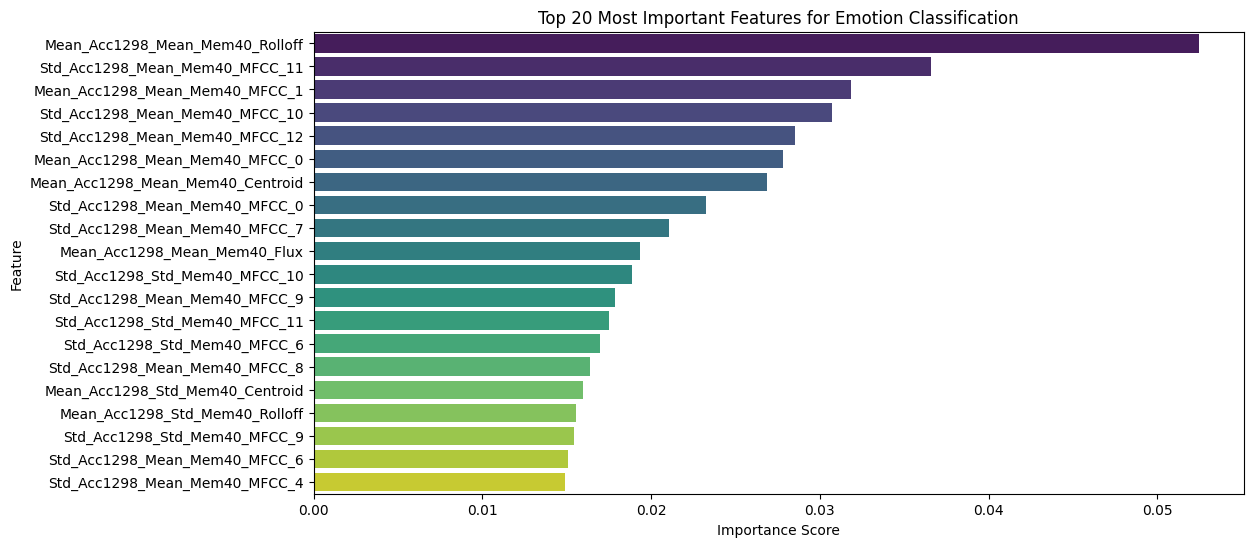

In [63]:
# Train a Random Forest model for feature importance analysis
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = X.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Plot feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_importances[:20], y=sorted_features[:20], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 20 Most Important Features for Emotion Classification")
plt.show()


# Ensemble Learning with Multiple Classifiers

In [69]:
# Load the reduced dataset
df_reduced = pd.read_csv("emotions_reduced.csv")

# Specify the emotion label columns
emotion_columns = ["amazed-suprised", "happy-pleased", "relaxing-calm", "quiet-still", "sad-lonely", "angry-aggresive"]

# Convert the one-hot encoded emotion labels to a single categorical label.
# This assumes that each row has exactly one emotion marked as '1'.
df_reduced["emotion"] = df_reduced[emotion_columns].idxmax(axis=1)

# Prepare feature matrix X and target vector y
# Drop the original one-hot emotion columns and the new 'emotion' column from X
X = df_reduced.drop(columns=emotion_columns + ["emotion"])
y = df_reduced["emotion"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define individual classifiers
clf1 = LogisticRegression(max_iter=1000, random_state=42)
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf3 = GradientBoostingClassifier(n_estimators=100, random_state=42)
clf4 = AdaBoostClassifier(n_estimators=100, random_state=42)

# Create an ensemble using VotingClassifier with hard voting (majority vote)
ensemble_clf = VotingClassifier(estimators=[
    ('lr', clf1),
    ('rf', clf2),
    ('gb', clf3),
    ('ab', clf4)
], voting='hard')

# Train the ensemble classifier
ensemble_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ensemble_clf.predict(X_test)

# Evaluate and print the classification performance
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 precision    recall  f1-score   support

amazed-suprised       0.54      0.75      0.63        36
angry-aggresive       0.33      0.07      0.11        15
  happy-pleased       0.24      0.19      0.21        21
    quiet-still       0.33      0.22      0.27         9
  relaxing-calm       0.51      0.67      0.58        33
     sad-lonely       0.00      0.00      0.00         5

       accuracy                           0.47       119
      macro avg       0.33      0.32      0.30       119
   weighted avg       0.41      0.47      0.42       119



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

                 precision    recall  f1-score   support

amazed-suprised       0.54      0.75      0.63        36
angry-aggresive       0.33      0.07      0.11        15
  happy-pleased       0.24      0.19      0.21        21
    quiet-still       0.33      0.22      0.27         9
  relaxing-calm       0.51      0.67      0.58        33
     sad-lonely       0.00      0.00      0.00         5

       accuracy                           0.47       119
      macro avg       0.33      0.32      0.30       119
   weighted avg       0.41      0.47      0.42       119



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


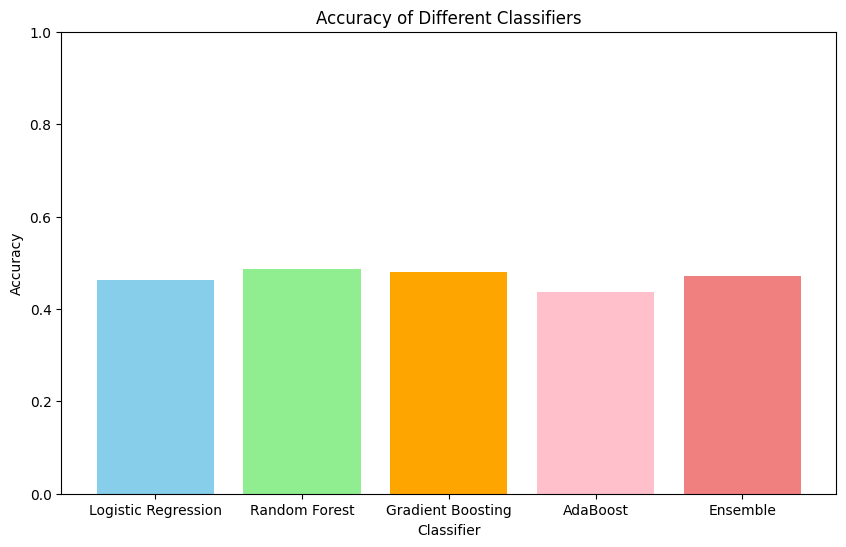

In [73]:
# Load the reduced dataset
df_reduced = pd.read_csv("emotions_reduced.csv")

# Specify the emotion label columns
emotion_columns = ["amazed-suprised", "happy-pleased", "relaxing-calm", "quiet-still", "sad-lonely", "angry-aggresive"]

# Convert the one-hot encoded emotion labels to a single categorical label.
# This assumes that each row has exactly one emotion marked as '1'.
df_reduced["emotion"] = df_reduced[emotion_columns].idxmax(axis=1)

# Prepare feature matrix X and target vector y
# Drop the original one-hot emotion columns and the new 'emotion' column from X
X = df_reduced.drop(columns=emotion_columns + ["emotion"])
y = df_reduced["emotion"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define individual classifiers
clf1 = LogisticRegression(max_iter=1000, random_state=42)
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)
clf3 = GradientBoostingClassifier(n_estimators=100, random_state=42)
clf4 = AdaBoostClassifier(n_estimators=100, random_state=42)

# Create an ensemble using VotingClassifier with hard voting (majority vote)
ensemble_clf = VotingClassifier(estimators=[
    ('lr', clf1),
    ('rf', clf2),
    ('gb', clf3),
    ('ab', clf4)
], voting='hard')

# Train the ensemble classifier
ensemble_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ensemble_clf.predict(X_test)

# Evaluate and print the classification performance
print(classification_report(y_test, y_pred))

# --- Add accuracy plot ---
classifiers = {
    "Logistic Regression": clf1,
    "Random Forest": clf2,
    "Gradient Boosting": clf3,
    "AdaBoost": clf4,
    "Ensemble": ensemble_clf
}

accuracies = []
for name, clf in classifiers.items():
    # For the ensemble, we already have predictions (y_pred)
    if name == "Ensemble":
        y_pred_clf = y_pred
    else:
        # Fit the individual classifier before making predictions
        clf.fit(X_train, y_train)
        y_pred_clf = clf.predict(X_test)  # Predict for individual classifiers

    accuracies.append(accuracy_score(y_test, y_pred_clf))

plt.figure(figsize=(10, 6))
plt.bar(classifiers.keys(), accuracies, color=['skyblue', 'lightgreen', 'orange', 'pink', 'lightcoral'])
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Classifiers")
plt.ylim([0, 1])  # Set y-axis limits to 0-1 for accuracy
plt.show()

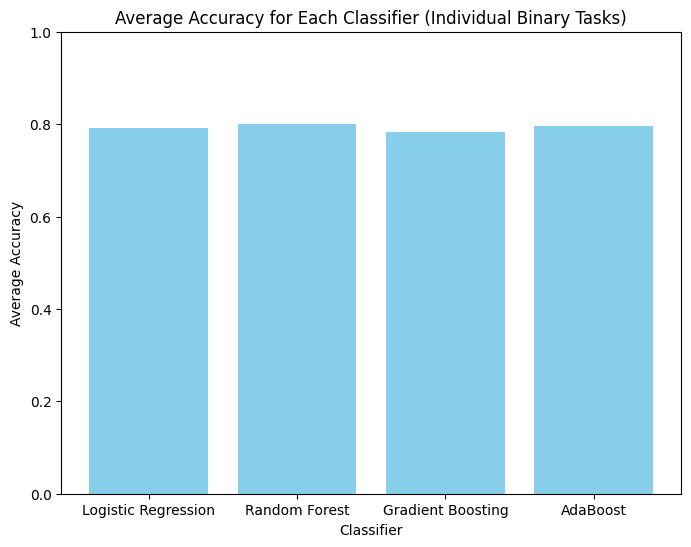

In [66]:
# Load the reduced dataset
df_reduced = pd.read_csv("emotions_reduced.csv")

# Specify the emotion label columns
emotion_columns = ["amazed-suprised", "happy-pleased", "relaxing-calm", "quiet-still", "sad-lonely", "angry-aggresive"]

# Prepare features (X) and multi-label targets (y)
X = df_reduced.drop(columns=emotion_columns)
y = df_reduced[emotion_columns]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define individual classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42)
}

# Calculate overall average accuracy for each classifier across all emotion labels
accuracies = {}
for name, classifier in classifiers.items():
    label_accuracies = []
    for label in emotion_columns:
        # Clone the classifier to ensure a fresh instance for each label
        clf = clone(classifier)
        clf.fit(X_train, y_train[label])
        y_pred_label = clf.predict(X_test)
        acc = np.mean(y_pred_label == y_test[label])
        label_accuracies.append(acc)
    overall_acc = np.mean(label_accuracies)
    accuracies[name] = overall_acc

# Draw a bar plot of the accuracies for each classifier
plt.figure(figsize=(8,6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel("Classifier")
plt.ylabel("Average Accuracy")
plt.title("Average Accuracy for Each Classifier (Individual Binary Tasks)")
plt.ylim([0, 1])
plt.show()


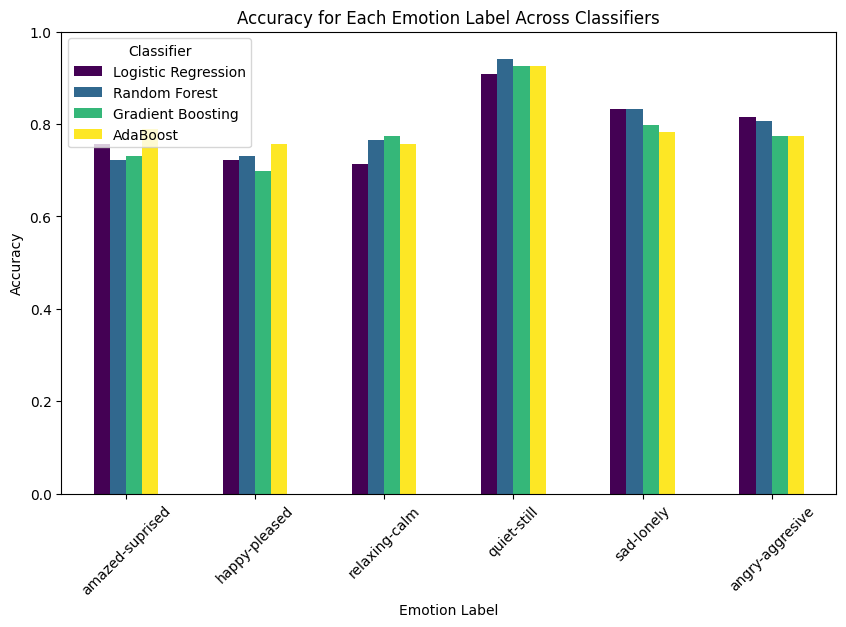

In [57]:
# Load the reduced dataset
df_reduced = pd.read_csv("emotions_reduced.csv")

# Specify the emotion label columns
emotion_columns = ["amazed-suprised", "happy-pleased", "relaxing-calm", "quiet-still", "sad-lonely", "angry-aggresive"]

# Prepare features (X) and multi-label targets (y)
X = df_reduced.drop(columns=emotion_columns)
y = df_reduced[emotion_columns]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define individual classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42)
}

# Store accuracy results
accuracy_results = {name: [] for name in classifiers.keys()}

# Train classifiers for each emotion label independently
for name, classifier in classifiers.items():
    for label in emotion_columns:
        clf = clone(classifier)  # Clone classifier to avoid state carry-over
        clf.fit(X_train, y_train[label])  # Train on individual emotion label
        y_pred_label = clf.predict(X_test)  # Predict for the label
        acc = np.mean(y_pred_label == y_test[label])  # Compute accuracy
        accuracy_results[name].append(acc)

# Convert results to DataFrame for visualization
accuracy_df = pd.DataFrame(accuracy_results, index=emotion_columns)

# Plot accuracy per classifier for each emotion label
accuracy_df.plot(kind='bar', figsize=(10,6), colormap='viridis')
plt.xlabel("Emotion Label")
plt.ylabel("Accuracy")
plt.title("Accuracy for Each Emotion Label Across Classifiers")
plt.ylim([0, 1])
plt.legend(title="Classifier")
plt.xticks(rotation=45)
plt.show()


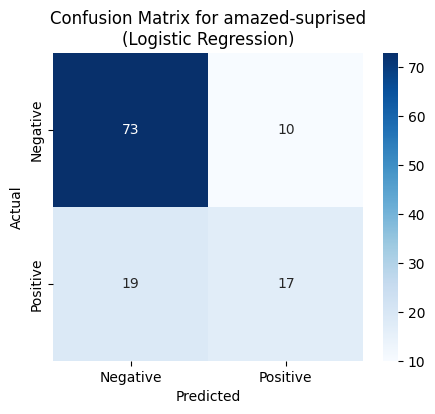

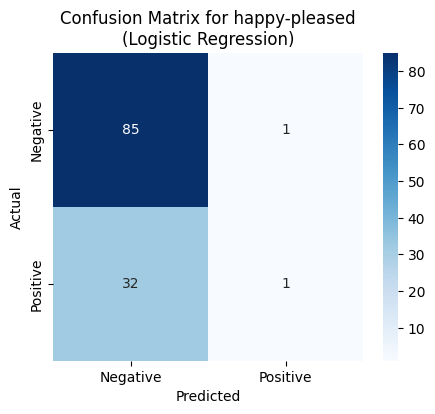

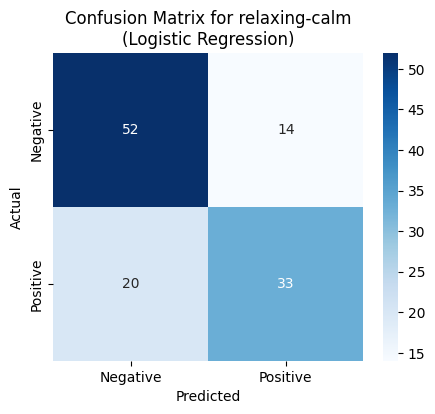

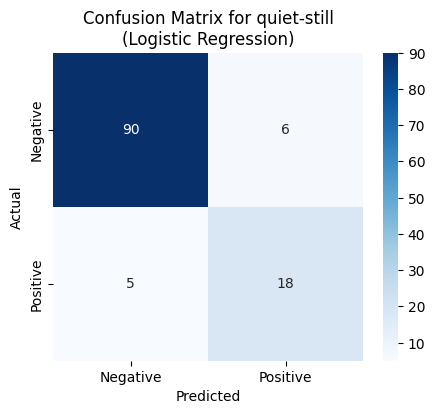

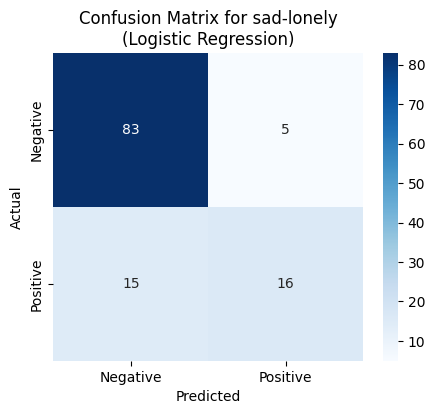

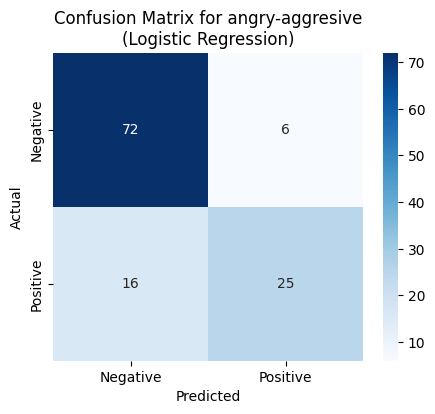

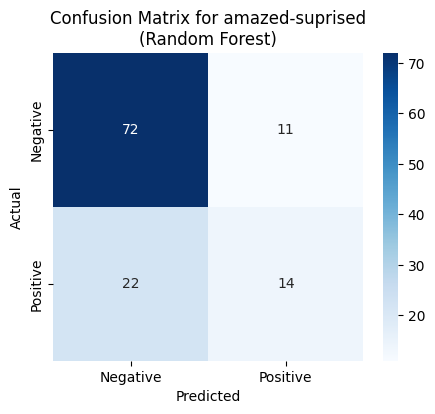

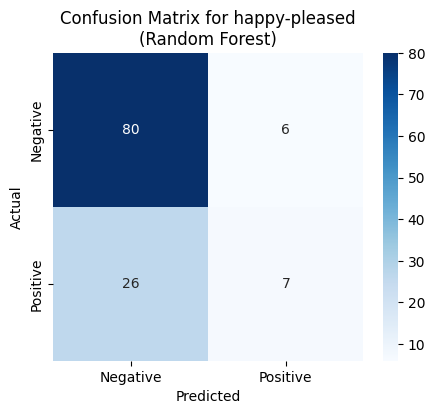

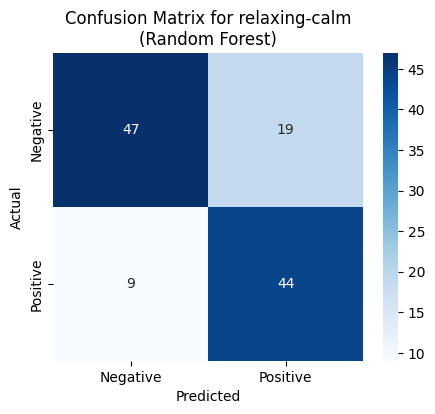

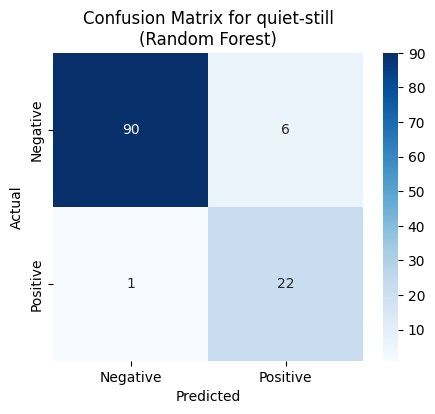

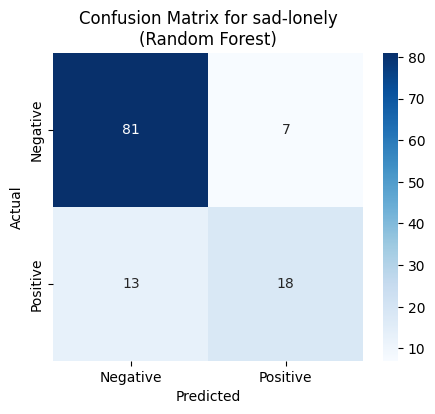

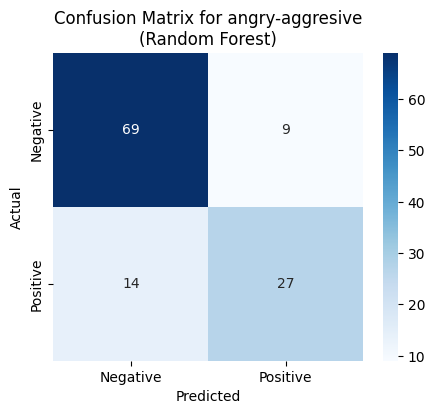

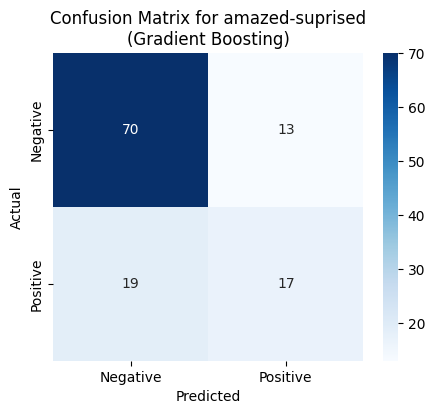

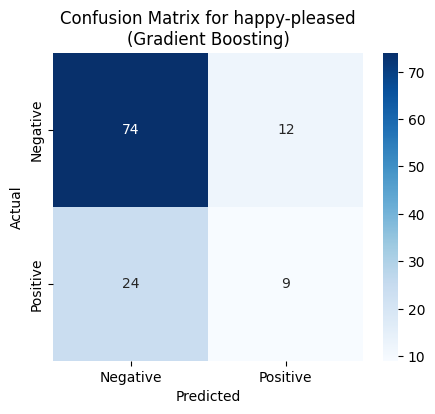

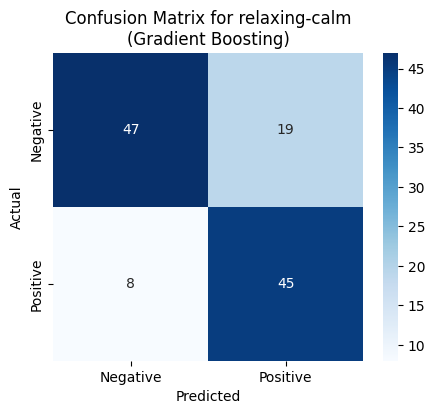

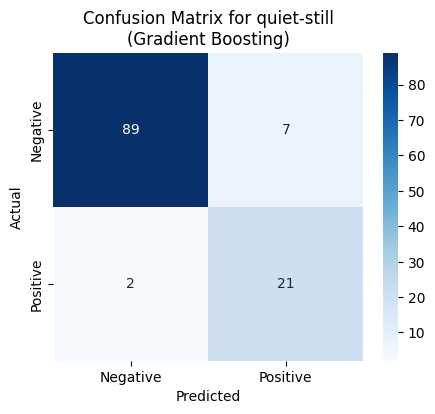

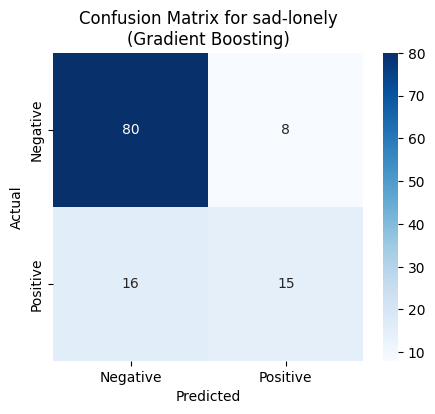

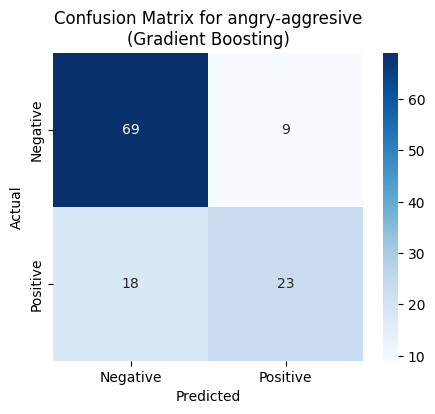

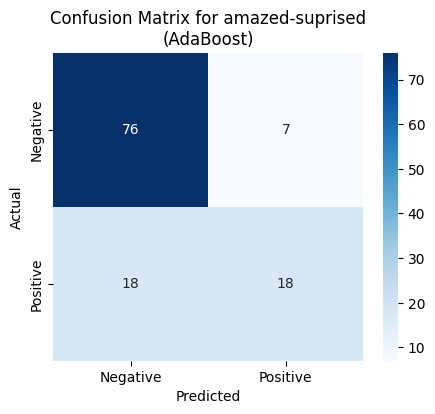

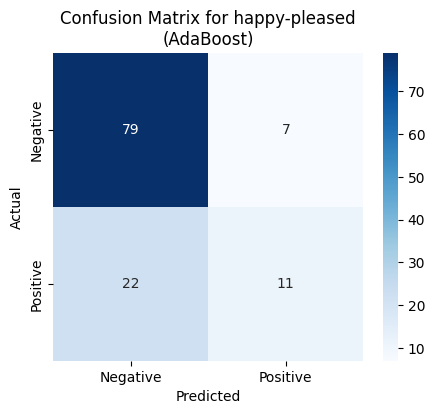

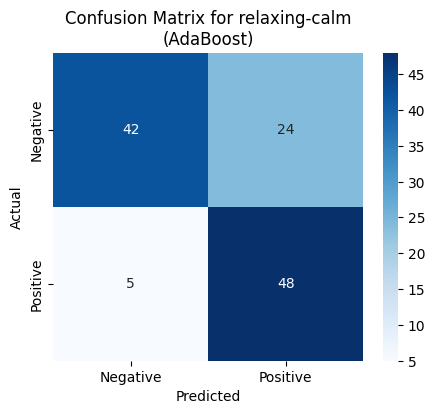

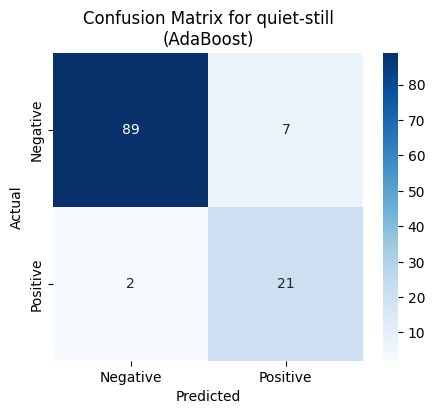

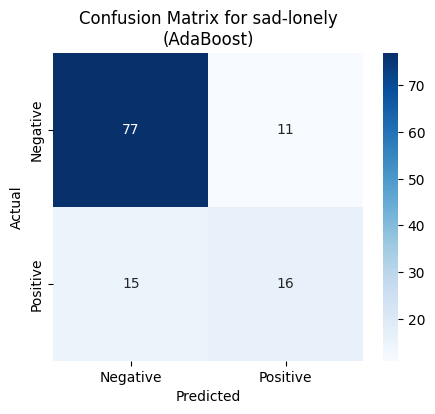

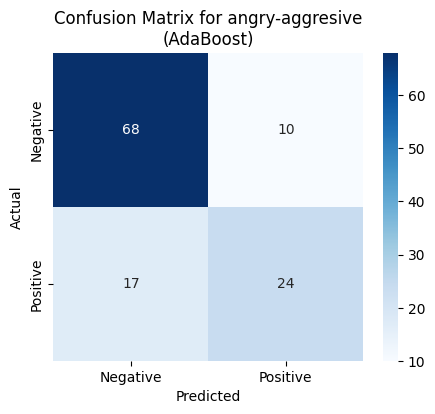

In [58]:
# Load the reduced dataset
df_reduced = pd.read_csv("emotions_reduced.csv")

# Specify the emotion label columns
emotion_columns = ["amazed-suprised", "happy-pleased", "relaxing-calm", "quiet-still", "sad-lonely", "angry-aggresive"]

# Prepare features (X) and multi-label targets (y)
X = df_reduced.drop(columns=emotion_columns)
y = df_reduced[emotion_columns]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define individual classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42)
}

# Iterate over classifiers and emotion labels to compute confusion matrices
for name, classifier in classifiers.items():
    for label in emotion_columns:
        # Train classifier separately for each emotion label
        clf = classifier.fit(X_train, y_train[label])
        y_pred_label = clf.predict(X_test)

        # Compute confusion matrix
        cm = confusion_matrix(y_test[label], y_pred_label)

        # Plot confusion matrix
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title(f"Confusion Matrix for {label}\n({name})")
        plt.show()


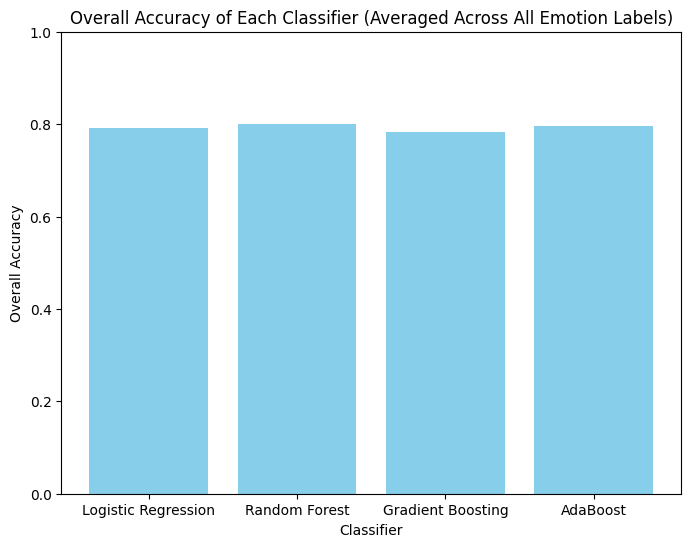

In [59]:
# Load the reduced dataset
df_reduced = pd.read_csv("emotions_reduced.csv")

# Specify the emotion label columns
emotion_columns = ["amazed-suprised", "happy-pleased", "relaxing-calm", "quiet-still", "sad-lonely", "angry-aggresive"]

# Prepare features (X) and multi-label targets (y)
X = df_reduced.drop(columns=emotion_columns)
y = df_reduced[emotion_columns]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define individual classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42)
}

# Store overall accuracy results
overall_accuracies = {}

# Train classifiers for each emotion label independently
for name, classifier in classifiers.items():
    label_accuracies = []
    for label in emotion_columns:
        clf = clone(classifier)  # Clone classifier to avoid state carry-over
        clf.fit(X_train, y_train[label])  # Train on individual emotion label
        y_pred_label = clf.predict(X_test)  # Predict for the label
        acc = accuracy_score(y_test[label], y_pred_label)  # Compute accuracy
        label_accuracies.append(acc)

    # Compute overall accuracy (average across all emotion labels)
    overall_accuracies[name] = np.mean(label_accuracies)

# Draw a bar plot of overall accuracies for each classifier
plt.figure(figsize=(8,6))
plt.bar(overall_accuracies.keys(), overall_accuracies.values(), color='skyblue')
plt.xlabel("Classifier")
plt.ylabel("Overall Accuracy")
plt.title("Overall Accuracy of Each Classifier (Averaged Across All Emotion Labels)")
plt.ylim([0, 1])
plt.show()
